In [1]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

In [69]:
#creating a list of tweets from LA for the second half of 2017 (english only)
#looking at burglary keywords
tweets_list = []

#find tweets that include the brand glossier or #glossier
query = '''burglary OR burglar OR burglarized OR stolen OR stole until:2017-12-31 since:2017-01-01 lang:en near:"Los Angeles"'''

for i, tweet in enumerate(sntwitter.TwitterSearchScraper(query=query).get_items()):
        if i > 5000: 
            break
        tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.retweetCount])

In [70]:
len(tweets_list)

5415

In [72]:
tweets_df = pd.DataFrame(tweets_list, columns=['Date', 'Tweet Id', 'Text', 'User', 'Likes', 'Retweets'])
tweets_df.head()

,Date,Tweet Id,Text,User,Likes,Retweets
0,2017-12-30 21:57:58+00:00,947225272117370880,🚨 WILSHIRE/FAIRFAX AREA 🚨 Some random man stol...,JennieMelissa,3,0
1,2017-12-30 21:52:41+00:00,947223942955122689,@DevinColson I loved bad ape. Stole all the sc...,The_5th_Turtle,1,0
2,2017-12-30 21:36:21+00:00,947219832440844288,"congratulations Dwayne ""The rock"" Johnson's da...",johnlawofficial,0,0
3,2017-12-30 20:01:23+00:00,947195935884324864,Thinking about how in the future people could ...,erinyasgar,0,0
4,2017-12-30 19:54:50+00:00,947194287313129472,My phone has been stolen. If you need to reach...,kevkrav,1,0


In [73]:
#find all hashtags and @ mentions used
hashtag_list = []

for tweet in tweets_list:
    for word in tweet[2].split():
        if word.startswith('#'):
            hashtag_list.append(word)
        else:
            continue

In [74]:
#find counts of each hashtags and sort them by most used
unique_hashtags = []
hashtag_counts = []

for word in hashtag_list:
    count = 0
    if word in unique_hashtags:
        continue
    else:
        for w in hashtag_list:
            if word == w:
                count = count+1
            else:
                continue
        unique_hashtags.append(word)
        dict = {}
        dict['hashtag'] = word
        dict['count'] = count
        hashtag_counts.append(dict)

sorted_hashtags = sorted(hashtag_counts, key = lambda d: d['count'], reverse=True)

In [75]:
#print the top 10 hashtags
for hashtag in sorted_hashtags[:10]:
    print('Hashtag:', hashtag['hashtag'], 'Count', hashtag['count'])

Hashtag: #LA Count 27
Hashtag: #LosAngeles Count 16
Hashtag: #stolen Count 13
Hashtag: #HelpSamantha Count 13
Hashtag: #HelpShareMyStory Count 13
Hashtag: # Count 10
Hashtag: #Repost Count 10
Hashtag: #hollywood Count 9
Hashtag: #Oscars Count 9
Hashtag: #Stolen Count 7


## Understand the Text Content

In [76]:
import nltk
msglist = tweets_df['Text']
all_tokens = [tok for msg in msglist for tok in nltk.word_tokenize(msg)]
len(all_tokens)

118744

In [77]:
#first 10 tokens
all_tokens[:10]

['🚨',
 'WILSHIRE/FAIRFAX',
 'AREA',
 '🚨',
 'Some',
 'random',
 'man',
 'stole',
 'my',
 'friends']

In [78]:
#make tokens all lowercase
all_tokens = [tok.lower() for msg in msglist for tok in nltk.word_tokenize(msg)]

In [79]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Samantha
[nltk_data]     White\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [80]:
#get a list of stopwords
nltk_stopwords = nltk.corpus.stopwords.words('english')
nltk_stopwords.append("'s")
nltk_stopwords.append("n't")

In [81]:
#remove stopwords from conversation and non keywords
import re
def alpha_filter(w):
    pattern = re.compile('^[^a-z]+$') 
    if (pattern.match(w)): 
        return True
    else:
        return False

t_list = [tok for tok in all_tokens if not alpha_filter(tok)]

token_list = []
for tok in t_list:
    if tok in nltk_stopwords:
        continue
    else: 
        token_list.append(tok)
token_list[:10]

['wilshire/fairfax',
 'area',
 'random',
 'man',
 'stole',
 'friends',
 'dog',
 'peddles',
 'please',
 'keep']

In [82]:
#find 10 most common words
msgFD = nltk.FreqDist(token_list) 
top_words = msgFD.most_common(10) 
for word, freq in top_words: 
    print(word+":", freq, "tweets") 

stole: 3306 tweets
https: 2231 tweets
stolen: 1958 tweets
someone: 404 tweets
amp: 404 tweets
car: 364 tweets
got: 325 tweets
like: 325 tweets
one: 301 tweets
get: 239 tweets


### See spikes in conversation over time

In [ ]:
tweets_df['Date'] = pd.to_datetime(tweets_df['Date']).dt.date

In [88]:
tweets_bydate = pd.DataFrame(tweets_df.groupby('Date').size())

<AxesSubplot:xlabel='Date'>

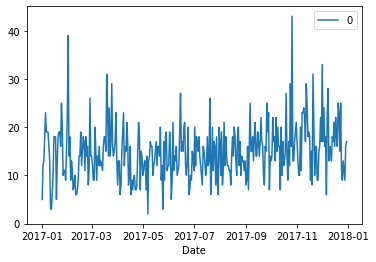

In [89]:
tweets_bydate.plot.line()

In [95]:
import datetime
october1 = datetime.date(2017, 10, 1)
november1 = datetime.date(2017, 11, 1)

october_tweets = tweets_df.loc[(tweets_df['Date'] >= october1) & (tweets_df['Date'] < november1)]
october_tweets.head()

,Date,Tweet Id,Text,User,Likes,Retweets
1035,2017-10-31,925510189612130305,Yes bitch I stole all your chocolate.,gomez_the_4th,0,0
1036,2017-10-31,925458396559523841,@PLASTICPIZZA he stole your idea... https://t....,Bmac,0,0
1037,2017-10-31,925438700884021248,Suspect in Stolen Sheriff’s SUV Surrenders aft...,FOX40,0,0
1038,2017-10-31,925398564276023296,I hope you don’t get ur candy stolen tonight b...,OfficialBradlee,680,69
1039,2017-10-31,925379249120329730,Why get the Left and Right mad about Clinton's...,seriousfun8309,0,0


In [113]:
#what were the 5 tweets with the most likes in October
most_liked = tweets_df.sort_values(by=['Likes'], ascending=False).head()
msgs = most_liked['Text']
msg_list = []
for message in msgs:
    msg_list.append(message)
likes = most_liked['Likes']
like_list = []
for l in likes:
    like_list.append(l)

for i in range(4):
    print('Message:', msg_list[i])
    print('Likes:', like_list[i])
    print(' ')

Message: Growing up, my biggest dream was to be photographed for GQ. Hahahahahhaaaa NOT. I stole someone else's dream Lolz! #GQ #ThorRagnarok https://t.co/GSBGnkQE6T
Likes: 18171
 
Message: Tell me why my postmates guy cancelled my order when it was on the way... dude straight up stole my food lol... wtf
Likes: 4010
 
Message: $5000 TO ANYONE THAT FINDS MY LAPTOPS, HARD DRIVES, PHONE OR ANYTHING ELSE STOLEN. EMAIL - WillSingesShit@gmail.com
Likes: 2748
 
Message: I Can't Cap I Stole $20 Out My Bitch Purse Just To Feel Like One Of Those Cute Ain't Shit Niggas.

I'll Return It Eventually but It Felt Good.
Likes: 2627
 


### Understand the car conversation
Car conversation